In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Dense, Flatten

In [2]:
mnist.load_data(path="mnist.npz")

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
x_train[7]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

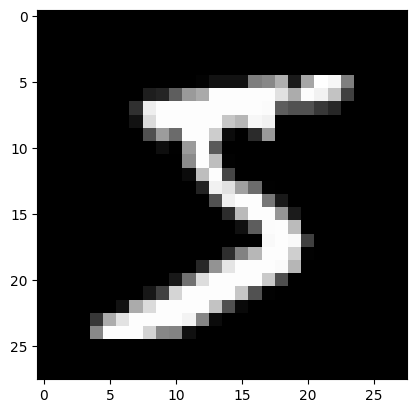

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = "gray")

In [10]:
y_train[0]

5

In [11]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation= "relu" ))
model.add(Dense(10, activation= "softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"] )

In [23]:
history = model.fit(x_train, y_train, epochs=20, validation_split= 0.20)

Epoch 1/20
1500/1500 [==============================] - 12s 6ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.1234 - val_accuracy: 0.9793
Epoch 2/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.1366 - val_accuracy: 0.9746
Epoch 3/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.1438 - val_accuracy: 0.9748
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.1325 - val_accuracy: 0.9772
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.1490 - val_accuracy: 0.9739
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.1469 - val_accuracy: 0.9755
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.1411 - val_accuracy

In [24]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [25]:
y_pred = y_prob.argmax(axis = 1)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test, y_pred)

0.9781

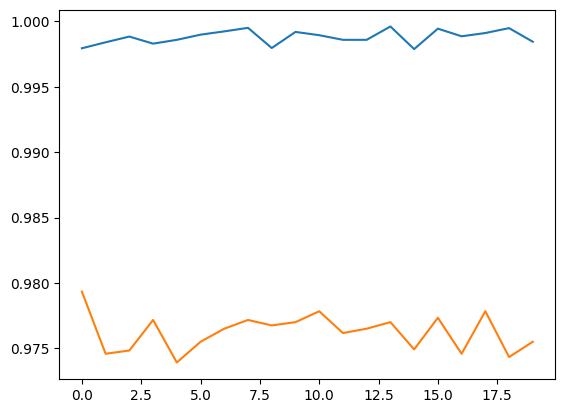

In [28]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])


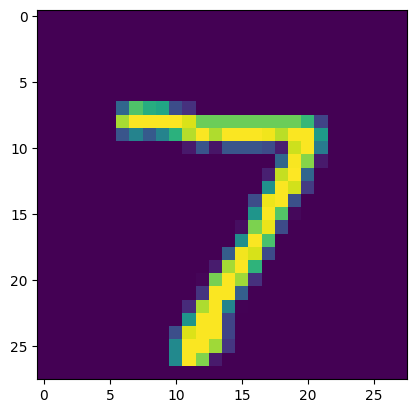

In [30]:
plt.imshow(x_test[0])

In [31]:
model.predict(x_test[0].reshape(1, 28, 28)).argmax(axis = 1)

1/1 [==============================] - 0s 58ms/step


array([7], dtype=int64)